# InD dataset

##  Intelligible Pedestrians Destination Prediction with Additive Models 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans

import glob,os
%matplotlib inline
import os

# Read data

In [2]:

files_ids = [x for x in range(13)]
root = './unids/'
all_files = []
all_meta_and_statics = []
for x in files_ids:
    idx = '{0:02d}'.format(x)
    meta_info_file = os.path.join(root,f'{idx}_recordingMeta.csv')
    file_ = os.path.join(root,f'{idx}_tracks.csv')
    static_file = os.path.join(root,f'{idx}_tracksMeta.csv')

    meta_info = pd.read_csv(meta_info_file)
    static_ = pd.read_csv(static_file)

    all_files.append(pd.read_csv(file_))
    all_meta_and_statics.append((meta_info,static_))


In [3]:
all_meta_and_statics[0][1]#.loc[:,'trackId']

,recordingId,trackId,initialFrame,finalFrame,numFrames,width,length,class
0,0,0,0,986,987,2.0686,4.7171,car
1,0,1,0,497,498,0.0000,0.0000,pedestrian
2,0,2,0,920,921,2.0659,5.0962,car
3,0,3,0,840,841,2.0706,4.8423,car
4,0,4,0,619,620,0.0000,0.0000,pedestrian
...,...,...,...,...,...,...,...,...
357,0,357,7848,8094,247,0.0000,0.0000,pedestrian
358,0,358,7888,8094,207,0.0000,0.0000,pedestrian
359,0,359,7903,8092,190,0.0000,0.0000,pedestrian
360,0,360,7912,8094,183,0.0000,0.0000,pedestrian


In [3]:
all_types_dict = {}
all_types = []
types_counts = {'animal':0, 'bicycle':0, 'bus':0, 'car':0, 'motorcycle':0, 'pedestrian':0, 'trailer':0, 'truck':0, 'van':0}
for id_ in range(13):
    all_types_dict.update({id_:{}})
    for agent_type,rows_ in all_meta_and_statics[id_][1].groupby('class'):
        all_types.append(agent_type)
        types_counts[agent_type] += len(rows_['trackId'].to_numpy())
        all_types_dict[id_].update({agent_type:rows_['trackId'].to_numpy()}) 
        
print('all types')
print(types_counts)

all types
{'animal': 3, 'bicycle': 711, 'bus': 28, 'car': 1248, 'motorcycle': 36, 'pedestrian': 7852, 'trailer': 3, 'truck': 38, 'van': 63}


In [7]:
all_files[12]
# add additional three colmouns

,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,lonVelocity,latVelocity,lonAcceleration,latAcceleration
0,12,0,0,0,148.6370,-64.9919,43.6886,1.9888,4.3758,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,-0.0000,0.0000
1,12,0,1,1,148.6370,-64.9919,43.6886,1.9888,4.3758,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,-0.0000,0.0000
2,12,0,2,2,148.6370,-64.9919,43.6886,1.9888,4.3758,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,-0.0000,0.0000
3,12,0,3,3,148.6370,-64.9919,43.6886,1.9888,4.3758,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,-0.0000,0.0000
4,12,0,4,4,148.6370,-64.9919,43.6886,1.9888,4.3758,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,-0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455545,12,729,22547,157,99.7157,-103.2837,219.7672,0.0000,0.0000,-0.8849,-0.7364,0.0694,0.1180,1.1513,0.0,-0.1289,0.0463
455546,12,729,22548,158,99.6807,-103.3131,219.6823,0.0000,0.0000,-0.8820,-0.7318,0.0695,0.1179,1.1461,0.0,-0.1288,0.0464
455547,12,729,22549,159,99.6457,-103.3423,219.5929,0.0000,0.0000,-0.8793,-0.7272,0.0695,0.1179,1.1410,0.0,-0.1287,0.0466
455548,12,729,22550,160,99.6106,-103.3714,219.5003,0.0000,0.0000,-0.8765,-0.7225,0.0695,0.1179,1.1359,0.0,-0.1286,0.0468


# Check collosion + avg speeds

In [4]:
all_speeds = [0,0,0]
for csv,trck_type in zip(all_files[11:],[all_types_dict[11],all_types_dict[12]]):
    cars, bikes, peds = [],[],[]
    for t in csv.trackId.to_numpy():
        cars.append(t in list(trck_type['car']))
        bikes.append(t in list(trck_type['bicycle']))
        peds.append(t in list(trck_type['pedestrian']))
    cars = np.array(cars)
    bicycle = np.array(bikes)
    pedestrian = np.array(peds)
    speeds = np.linalg.norm(np.array([csv.xVelocity.to_numpy(),csv.yVelocity.to_numpy()]),axis=0)
    print(speeds[cars].mean())
    print(speeds[bicycle].mean())
    print(speeds[pedestrian].mean())
    all_speeds[0] += speeds[pedestrian].mean()
    all_speeds[1] += speeds[bicycle].mean()
    all_speeds[2] += speeds[cars].mean()
print(np.array(all_speeds)/2)

2.7670198652818843
3.6612689385871544
1.3106809803284616
3.445737132430014
2.265141112993518
1.240744797106908
[1.27571289 2.96320503 3.1063785 ]


In [6]:
all_data_mat = []
for id_ in files_ids[11:]:

    vehicles_ids = list(all_types_dict[id_]['car'])
    if 'truck_bus' in all_types_dict[id_].keys():
        vehicles_ids += list(all_types_dict[id_]['truck_bus'])

    proximity = [[] for _ in range(2)]

    a = np.max(all_files[id_].trackId.to_numpy())
    b = np.max(all_files[id_].frame.to_numpy())
    ab = np.zeros((a,b))
    for frame,rows in all_files[id_].groupby('frame'):
        #print(frame)
        # split here to VRU vs Cars
        c_tracks = rows['trackId'].to_numpy()
        non_vrus = np.array(([(x in vehicles_ids) for x  in c_tracks]))
        vrus = np.logical_not(non_vrus)
        #if (vrus.sum()):
        poses = (np.vstack((rows['xCenter'].to_numpy(),rows['yCenter'].to_numpy())).T)
        
        for j,pose in enumerate(poses):
            distances_vrus = np.linalg.norm(poses[vrus]-pose,axis=1)
            distances_nonvrus = np.linalg.norm(poses[non_vrus]-pose,axis=1)
            #print(distances_vrus)
            #print(distances_nonvrus)
            
            proximity[0] = ((distances_vrus<0.5).sum()-vrus[j])
            proximity[1] = ((distances_nonvrus<0.5).sum()-non_vrus[j])
            
            if proximity[0] +  proximity[1]:
                ab[c_tracks[j],frame] = (vrus[j]*1 + non_vrus[j]*2)
                
    
    all_data_mat.append(ab.copy())

In [22]:
cars_mask_11 = np.array([t in all_types_dict[11]['car'] for t in np.unique(all_files[11].trackId.to_numpy())])[:-1]
cars_mask_12 = np.array([t in all_types_dict[12]['car'] for t in np.unique(all_files[12].trackId.to_numpy())])[:-1]

In [21]:
cars_mask_11.shape
all_data_mat[0].shape

(752, 26204)

In [23]:
sucess_rate = 0
survival_rate = 0
sucess_std = 0
survival_std = 0
for mat,car_mask in zip(all_data_mat,[cars_mask_11,cars_mask_12]):
    # sucess
    sucess_rate += (np.logical_not(mat >0)[car_mask[:]].all(axis=1).mean())
    sucess_std += (np.logical_not(mat >0)[car_mask[:]].all(axis=1).std())
    # survival
    survival_rate += ((np.cumsum(mat>0,axis=1)==0).sum(axis=1).mean())
    survival_std += ((np.cumsum(mat>0,axis=1)==0).sum(axis=1).std())
    
print(sucess_rate/2)
print(survival_rate/2)

print(sucess_std/2)
print(survival_std/2)

1.0
22497.444638713772
0.0
5371.451599817637


# Add new data (only done once)

In [8]:
ranges = [5,10,20]
if False:
    for id_ in files_ids[:]:
        idx = '{0:02d}'.format(id_)
        file_ = os.path.join(root,f'{idx}_tracks.csv')
        vehicles_ids = list(all_types_dict[id_]['car'])
        for nonvru_type in ['bus', 'motorcycle', 'trailer', 'truck', 'van']:
            if nonvru_type in all_types_dict[id_].keys():
                vehicles_ids += list(all_types_dict[id_][nonvru_type])
                
        proximity = [[] for _ in range(len(ranges)*2)]

        for frame,rows in all_files[id_].groupby('frame'):
            #print(frame)
            # split here to VRU vs Cars
            non_vrus = np.array(([(x in vehicles_ids) for x  in rows['trackId'].to_numpy()]))
            vrus = np.logical_not(non_vrus)
            #if (vrus.sum()):
            poses = (np.vstack((rows['xCenter'].to_numpy(),rows['yCenter'].to_numpy())).T)
            
            for j,pose in enumerate(poses):
                distances_vrus = np.linalg.norm(poses[vrus]-pose,axis=1)
                distances_nonvrus = np.linalg.norm(poses[non_vrus]-pose,axis=1)
                #print(distances_vrus)
                #print(distances_nonvrus)
                
                for jj in range(len(ranges)):
                    proximity[2*jj].append((distances_vrus<ranges[jj]).sum()-vrus[j])
                    proximity[2*jj+1].append((distances_nonvrus<ranges[jj]).sum()-non_vrus[j])

        for i,prox in enumerate(proximity):
            all_files[id_].insert(all_files[id_].shape[1],f'{["","non"][i%2]}vru_{ranges[i//2]}',prox)
            
        all_files[id_].to_csv(file_)
        print(f'file: {file_} is saved')
        

file: ./unids/00_tracks.csv is saved
file: ./unids/01_tracks.csv is saved
file: ./unids/02_tracks.csv is saved
file: ./unids/03_tracks.csv is saved
file: ./unids/04_tracks.csv is saved
file: ./unids/05_tracks.csv is saved
file: ./unids/06_tracks.csv is saved
file: ./unids/07_tracks.csv is saved
file: ./unids/08_tracks.csv is saved
file: ./unids/09_tracks.csv is saved
file: ./unids/10_tracks.csv is saved
file: ./unids/11_tracks.csv is saved
file: ./unids/12_tracks.csv is saved


In [9]:
all_files[1]

,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,...,lonVelocity,latVelocity,lonAcceleration,latAcceleration,vru_5,nonvru_5,vru_10,nonvru_10,vru_20,nonvru_20
0,1,0,0,0,155.2625,-57.9373,45.0698,1.9889,4.7828,0.0000,...,0.0000,0.0000,-0.0000,0.0000,2,1,2,1,2,1
1,1,0,1,1,155.2625,-57.9373,45.0698,1.9889,4.7828,0.0000,...,0.0000,0.0000,-0.0000,0.0000,0,1,2,1,2,1
2,1,0,2,2,155.2625,-57.9373,45.0698,1.9889,4.7828,0.0000,...,0.0000,0.0000,-0.0000,0.0000,1,0,2,0,4,0
3,1,0,3,3,155.2625,-57.9373,45.0698,1.9889,4.7828,0.0000,...,0.0000,0.0000,-0.0000,0.0000,0,0,0,0,1,0
4,1,0,4,4,155.2625,-57.9373,45.0698,1.9889,4.7828,0.0000,...,0.0000,0.0000,-0.0000,0.0000,0,1,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449029,1,760,19941,90,116.0893,-95.0052,43.9492,2.0572,5.1696,7.7844,...,10.8230,-0.0110,-0.0070,-0.0411,1,0,1,0,1,0
449030,1,760,19942,91,116.4005,-94.7046,43.9703,2.0572,5.1696,7.7830,...,10.8225,-0.0087,-0.0071,-0.0411,0,0,0,0,1,0
449031,1,760,19943,92,116.7117,-94.4039,43.9913,2.0572,5.1696,7.7815,...,10.8221,-0.0063,-0.0071,-0.0411,0,0,0,0,0,0
449032,1,760,19944,93,117.0228,-94.1031,44.0127,2.0572,5.1696,7.7802,...,10.8218,-0.0039,-0.0071,-0.0411,0,0,0,0,0,1


# SDD like split

In [8]:
current_type = 'bicycle'

In [28]:
in_tracks = []
tracks = []
current_type = 'car'
classes_dict = {'pedestrian':0,
                'bicycle':1,
                'car':2,
                'truck_bus':3}
in_ = []
all_tracks = []
samples_in = 0
Xs, Xs_test = [],[]
ys, ys_test = [],[]
trajs_full_len = 0

for i in (files_ids):
    # 8 seconds only and pedestrains 
    caruseful_tracks = (all_meta_and_statics[i][1]['numFrames']>(25*8))*(all_meta_and_statics[i][1]['class']==current_type)
    in_tracks = all_meta_and_statics[i][1]['trackId'][useful_tracks].to_numpy().tolist()

    ds = all_files[i].groupby('trackId')#['xCenter'].to_numpy()
    #trajs_full_len = int(traj_lens[i]*0.8)
    for track_id, track_rows in ds:
        if track_id in in_tracks:
            track = track_rows.to_dict(orient="list")
            tracks.append(track)
            #add as data point
            in_ = [track["xCenter"], track["yCenter"],track["heading"],track["xVelocity"], track["yVelocity"],
             track["xAcceleration"], track["yAcceleration"], track["width"], track["length"],
             track["vru_5"],track["vru_10"],track["vru_20"],track["nonvru_5"],track["nonvru_10"],track["nonvru_20"]]#,[track_class]*len(track["xCenter"])]
            
            # check if parked car (max movment >0.4m) for all the track
            track_array = np.array(in_).T[::10,:] # 25 equal 1s, then 10 equal 400ms
            #if np.linalg.norm(np.diff(np.array(in_).T[:,:2],axis=0),axis=1).max()<0.1 and current_type=='car':
            #    continue
            # rotation
            samples_in += 1
            for ii in range(track_array.shape[0]-20):
                X = track_array[(ii):(ii+8),:].copy()#+4
                c, s = np.cos(-1*(X[-1,2]+0)*np.pi/180), np.sin(-1*(X[-1,2]+0)*np.pi/180)
                R_mat = np.array([[c, -s], [s, c]])
                
                out = (track_array[(ii+8):(ii+20),:2] - X[-1:,:2]).copy()
                #out = (track_array[(ii+19):(ii+20),:2] - X[-1:,:2]).copy()
                X[:,:2] -= X[-1:,:2]

                # rotate positions
                X[:,:2] = (R_mat @ X[:,:2].T).T
                
                # ===== speed and acc
                X[:,3:5] = (R_mat @ X[:,3:5].T).T
                X[:,5:7] = (R_mat @ X[:,5:7].T).T
                
                #out[0,:2] = R_mat @ out[0,:2]
                #y = np.array([R_mat @ out_pnt for out_pnt in out]).flatten().copy()
                y = (R_mat @ out.T).T.flatten().copy()
                #y = out.copy()#[:,:2]
                #trajs_full_len -= 1
                if i<11:#trajs_full_len>0:# 80% data
                    Xs.append(X[:,:].flatten())
                    ys.append(y)
                else:
                    Xs_test.append(X[:,:].flatten())
                    ys_test.append(y)

Xs = np.vstack(Xs)
ys = np.vstack(ys)
Xs_test = np.vstack(Xs_test)
ys_test = np.vstack(ys_test)
print(Xs.shape)
print(ys.shape)
print(Xs_test.shape)
print(ys_test.shape)

(65705, 120)
(65705, 24)
(13790, 120)
(13790, 24)


## Format



In [35]:
yx_all = np.hstack((ys,Xs))
yx_test_all = np.hstack((ys_test,Xs_test))
np.save(f'unid_train_{current_type}.npy',yx_all)
np.save(f'unid_test_{current_type}.npy',yx_test_all)

In [13]:
yx_all[:,1].min()

-0.4409622113934652

In [62]:
ys.shape

(196123, 24)

# Save or load saved

In [10]:
if os.path.isfile(f'unid_train_{current_type}.npy'):
    yx_all = np.load(f'unid_train_{current_type}.npy')
    yx_test_all = np.load(f'unid_test_{current_type}.npy')
else:
    np.save(f'unid_train_{current_type}.npy',yx_all)
    np.save(f'unid_test_{current_type}.npy',yx_test_all)


In [16]:
4305/(13790+46650+4305)

0.06649162097459263

# Clustrize features



In [39]:
# cluster smoothed
smoothed_cloud = np.unique(np.round(yx_all[:,22:24],0),axis=0)
print(smoothed_cloud.shape)

use_kmeans = True
if use_kmeans:
    modes_n = 20
    clusterer = KMeans(n_clusters=modes_n,random_state=42).fit(smoothed_cloud)#,n_init=10

clusterer_labels_ = clusterer.predict(yx_all[:,22:24])

(631, 2)


In [12]:
use_kmeans = True
if use_kmeans:
    modes_n = 20
    clusterer = KMeans(n_clusters=modes_n,random_state=42).fit(yx_all[:,:2])#,n_init=10

In [6]:
clusterer.labels_[:,None]#predict(yx_all[:10,22:24])

array([[0],
       [0],
       [0],
       ...,
       [7],
       [7],
       [7]], dtype=int32)

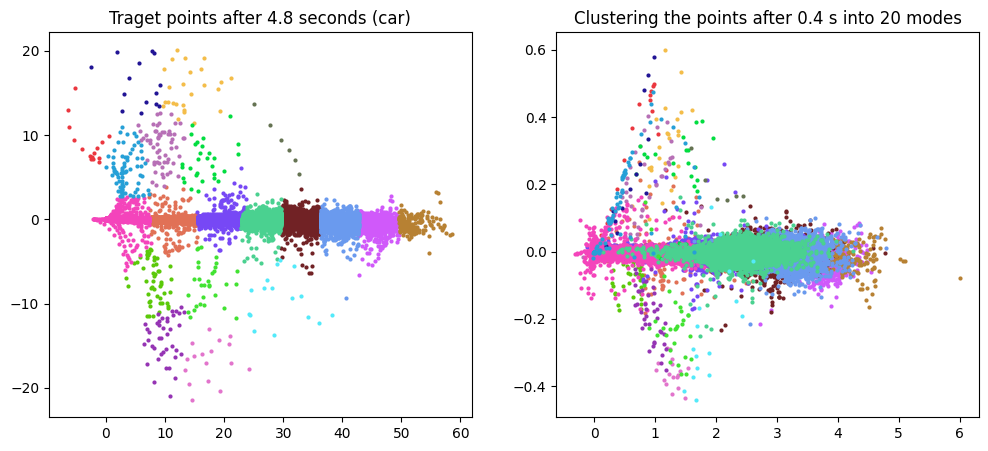

In [40]:
sub_modes = []
colors = []
if use_kmeans:
    plt.figure(figsize=(12,5))
    plt.subplot(122)
    for i in range(modes_n):
        cluster_i = (clusterer_labels_==i)
        sub_modes.append(yx_all[cluster_i])
        color = np.array([[np.random.rand() for _  in range(3)]])
        colors.append(color)
        plt.scatter(yx_all[cluster_i][:,0],yx_all[cluster_i][:,1],c=color,marker='.',linewidths=0.001)
    plt.title(f'Clustering the points after 0.4 s into {modes_n} modes')
    plt.subplot(121)
    for i in range(modes_n):
        cluster_i = (clusterer_labels_==i)
        sub_modes.append(yx_all[cluster_i])
        plt.scatter(yx_all[cluster_i][:,22],yx_all[cluster_i][:,23],c=colors[i],marker='.',linewidths=0.001)
    #plt.scatter(yx_all[:,22],yx_all[:,23],marker='.',linewidths=0.001)
    plt.title(f'Traget points after 4.8 seconds ({current_type})')
    plt.show()

Text(0.5, 1.0, 'Traget points after 4.8 seconds')

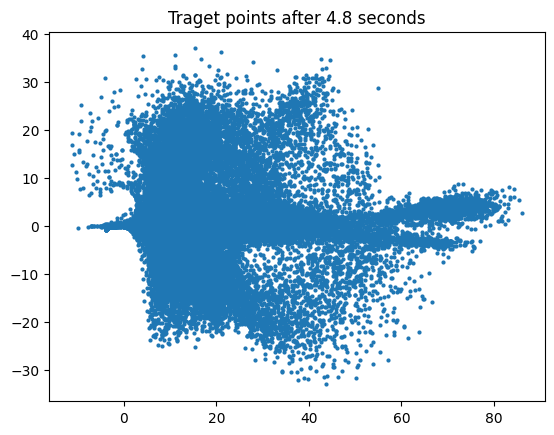

In [5]:
plt.scatter(yx_all[:,22],yx_all[:,23],marker='.',linewidths=0.001)
plt.title('Traget points after 4.8 seconds')